In [1]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    
    vertical-align: middle;
}
</style>
""")

In [2]:
# remove warnings
import warnings
warnings.filterwarnings('ignore')
# ---

%matplotlib inline
import pandas as pd
pd.options.display.max_columns = 100
from matplotlib import pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
import numpy as np

pd.options.display.max_rows = 100

In [3]:
data = pd.read_csv("titanic_data.csv")
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
data.fillna(data['Age'].median(), inplace=True)
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


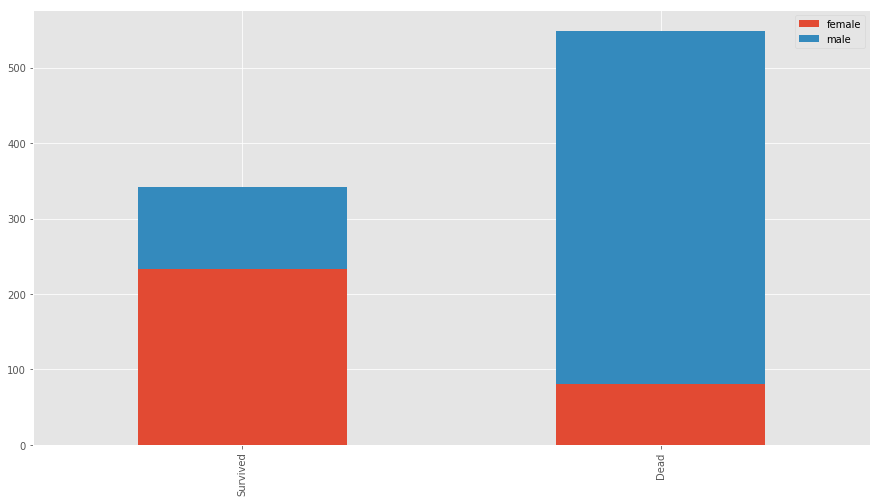

In [5]:
survived_sex = data[data['Survived']==1]['Sex'].value_counts()
dead_sex = data[data['Survived']==0]['Sex'].value_counts()
df = pd.DataFrame([survived_sex, dead_sex])
df.index = ['Survived', 'Dead']
df.plot(kind='bar', stacked=True, figsize=(15, 8))

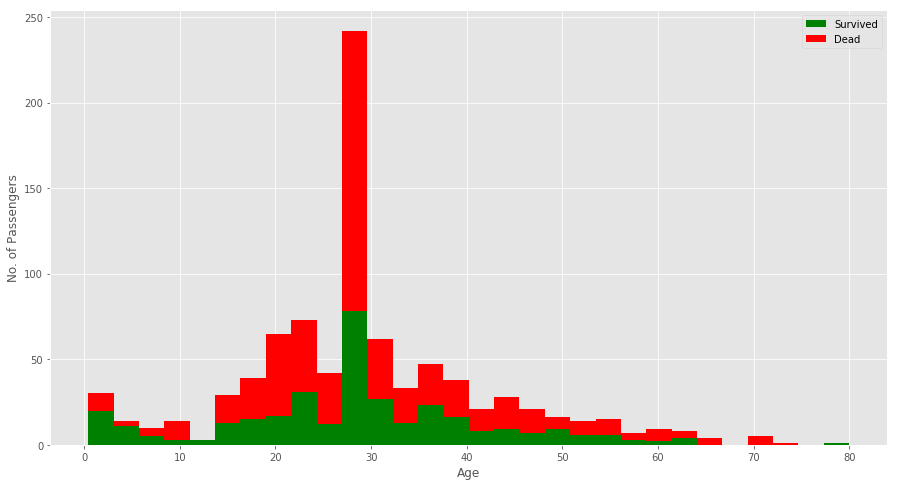

In [6]:
figure = plt.figure(figsize=(15,8))
plt.hist([data[data['Survived']==1]['Age'], data[data['Survived']==0]['Age']], stacked=True, color = ['g','r'], bins = 30,label = ['Survived','Dead'])
plt.xlabel('Age')
plt.ylabel('No. of Passengers')
plt.legend()

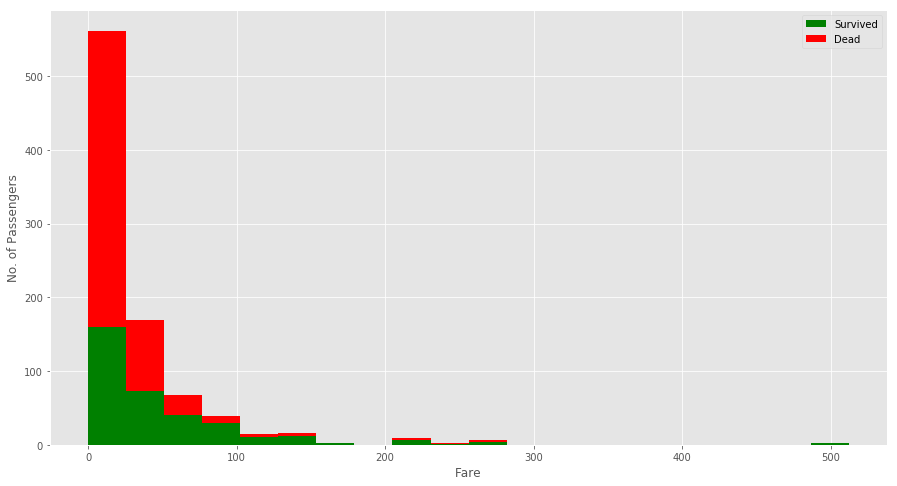

In [7]:
figure = plt.figure(figsize=(15,8))
plt.hist([data[data['Survived']==1]['Fare'], data[data['Survived']==0]['Fare']], stacked=True, bins=20, color=['g', 'r'], label=['Survived', 'Dead'])
plt.xlabel('Fare')
plt.ylabel('No. of Passengers')
plt.legend()

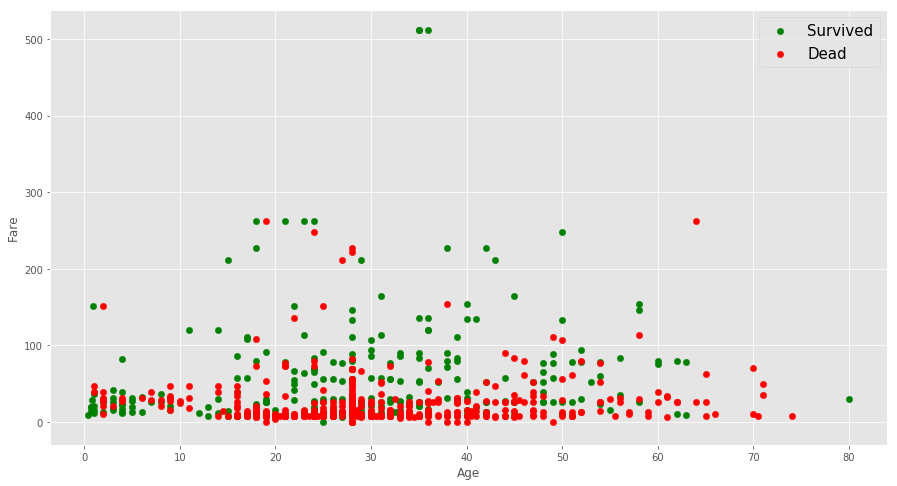

In [8]:
figure = plt.figure(figsize=(15,8))
ax = plt.subplot()
ax.scatter(data[data['Survived']==1]['Age'], data[data['Survived']==1]['Fare'], c='g', s=40)
ax.scatter(data[data['Survived']==0]['Age'], data[data['Survived']==0]['Fare'], c='r', s=40)
ax.set_xlabel('Age')
ax.set_ylabel('Fare')
ax.legend(('Survived', 'Dead'), scatterpoints=1, loc='upper right', fontsize=15)

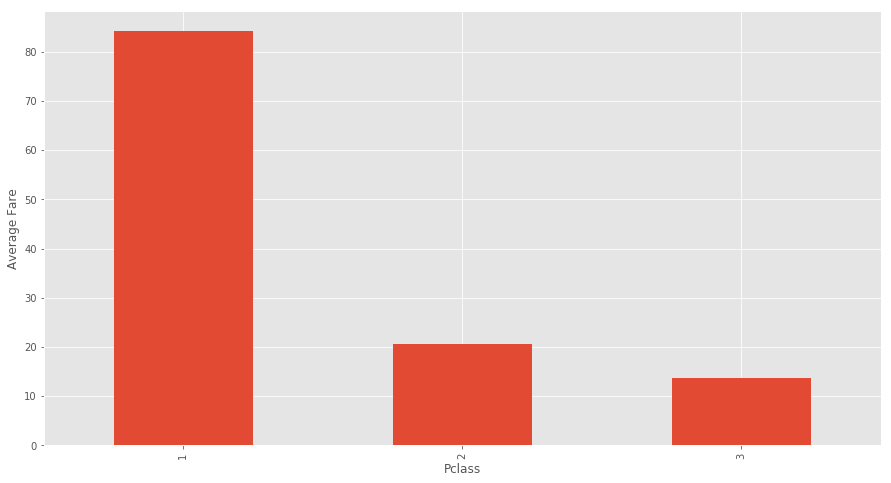

In [9]:
ax = plt.subplot()
ax.set_ylabel('Average Fare')
data.groupby('Pclass').mean()['Fare'].plot(kind='bar', figsize=(15, 8), ax=ax)

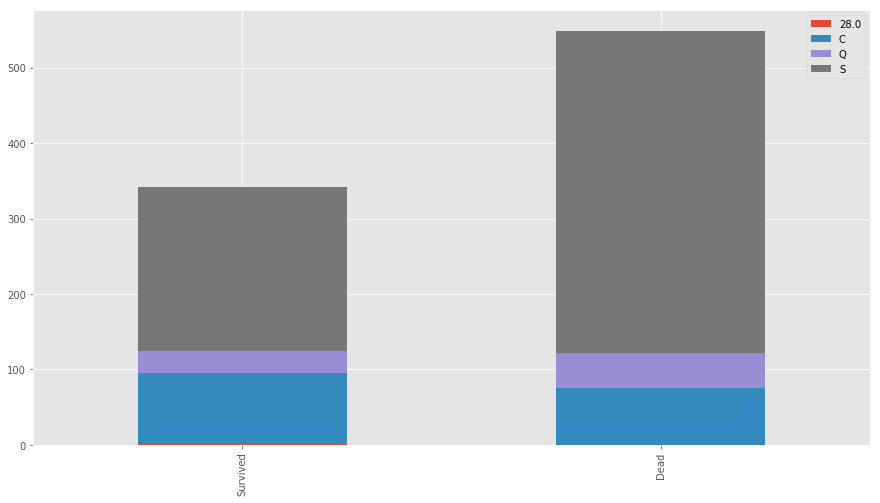

In [10]:
survived_embark = data[data['Survived']==1]['Embarked'].value_counts()
dead_embark = data[data['Survived']==0]['Embarked'].value_counts()
df = pd.DataFrame([survived_embark,dead_embark])
df.index = ['Survived','Dead']
df.plot(kind='bar', stacked=True, figsize=(15,8))

In [11]:
def status(feature):
    print "Processing", feature, ': ok'

def get_combined_data():
    train = pd.read_csv('titanic_data.csv')
    test = pd.read_csv('titanic_data_test.csv')
    targets = train.Survived
    train.drop('Survived', 1, inplace=True)
    combined = train.append(test)
    combined.reset_index(inplace=True)
    combined.drop('index', axis=1, inplace=True)
    return combined

In [12]:
combined = get_combined_data()
combined.shape

(1309, 11)

In [13]:
def get_titles():
    global combined
    
    combined['Title'] = combined.Name.map(lambda lst: lst.split()[1].strip()[:-1].strip())
    
    # a map of more aggregated titles
    Title_Dictionary = {
                        "Capt":       "Officer",
                        "Col":        "Officer",
                        "Major":      "Officer",
                        "Jonkheer":   "Royalty",
                        "Don":        "Royalty",
                        "Sir" :       "Royalty",
                        "Dr":         "Officer",
                        "Rev":        "Officer",
                        "the Countess":"Royalty",
                        "Dona":       "Royalty",
                        "Mme":        "Mrs",
                        "Mlle":       "Miss",
                        "Ms":         "Mrs",
                        "Mr" :        "Mr",
                        "Mrs" :       "Mrs",
                        "Miss" :      "Miss",
                        "Master" :    "Master",
                        "Lady" :      "Royalty"

                        }
    combined['Title'] = combined.Title.map(Title_Dictionary)
    
get_titles()
combined.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [14]:
grouped_train_median = combined.head(891).groupby(['Sex', 'Pclass', 'Title']).median()

grouped_test_median = combined.iloc[891:].groupby(['Sex', 'Pclass', 'Title']).median()

In [15]:
grouped_train_median

PassengerId   Age  SibSp  Parch       Fare
Sex    Pclass Title                                              
female 1      Miss           369.0  30.0    0.0    0.0   88.25000
              Mrs            506.5  41.5    1.0    0.0   78.73335
              Officer        797.0  49.0    0.0    0.0   25.92920
       2      Miss           428.0  24.0    0.0    0.0   13.00000
              Mrs            439.5  31.5    1.0    0.0   26.00000
       3      Miss           372.0  18.0    0.0    0.0    8.66250
              Mrs            395.0  31.5    1.0    1.0   15.85000
male   1      Master         446.0   4.0    1.0    2.0  120.00000
              Mr             463.0  40.0    0.0    0.0   42.40000
              Officer        648.0  51.0    0.0    0.0   35.50000
              Royalty        427.0  39.0    0.0    0.0   13.86040
       2      Master         408.0   1.0    1.0    1.0   26.00000
              Mr             440.0  31.0    0.0    0.0   13.00000
              Officer        358.5  46.5    0.0    0.0   13.00000
       3      Master         270.5   4.0    3.5    1.0   28.51250
              Mr             475.0  26.0    0.0    0.0    7.89580

In [16]:
grouped_test_median

PassengerId   Age  SibSp  Parch       Fare
Sex    Pclass Title                                              
female 1      Miss          1074.0  32.0    0.0    0.0  158.20835
              Mrs           1076.0  48.0    1.0    0.0   63.35830
       2      Miss          1130.0  19.0    1.0    1.0   26.00000
              Mrs           1133.0  29.5    0.0    0.0   26.00000
       3      Miss          1090.5  22.0    0.0    0.0    7.87920
              Mrs           1051.0  26.0    1.0    1.0   14.45420
male   1      Master        1022.0   9.5    1.0    2.0  198.43750
              Mr            1107.0  42.0    0.0    0.0   50.49580
              Officer       1094.0  53.0    1.0    0.0   81.85830
       2      Master        1033.5   5.0    0.5    1.5   27.75000
              Mr            1139.0  28.0    0.0    0.0   13.00000
              Officer       1048.5  35.5    0.5    0.5   19.50000
       3      Master        1173.0   6.5    1.0    1.0   20.25000
              Mr            1101.5  25.0    0.0    0.0    7.85420

In [17]:
combined.loc[547]

PassengerId                           548
Pclass                                  2
Name           Padro y Manent, Mr. Julian
Sex                                  male
Age                                   NaN
SibSp                                   0
Parch                                   0
Ticket                      SC/PARIS 2146
Fare                              13.8625
Cabin                                 NaN
Embarked                                C
Title                                 NaN
Name: 547, dtype: object

In [18]:
def process_age():
    global combined
    def fillAges(row, grouped_median):
        sex = row['Sex']
        pclass = row['Pclass']
        title = row['Title']
        if sex==sex and pclass == pclass and title == title:
            return grouped_median.loc[sex, pclass, title]['Age']
        else:
            return combined.Age.median()
    combined.head(891).Age = combined.head(891).apply(lambda r : fillAges(r, grouped_train_median) if np.isnan(r['Age']) else r['Age'], axis=1)
    combined.iloc[891:].Age = combined.iloc[891:].apply(lambda r : fillAges(r, grouped_test_median) if np.isnan(r['Age']) else r['Age'], axis=1)
    
    status('Age')

In [19]:
process_age()

Processing Age : ok


In [20]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1309 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Title          1272 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 92.1+ KB


In [21]:
def process_names():
    global combined
    combined.drop('Name', axis=1, inplace=True)
    
    title_dummies = pd.get_dummies(combined['Title'], prefix='Title')
    combined = pd.concat([combined, title_dummies], axis=1)
    
    combined.drop(['Title'], axis=1, inplace=True)
    status('Name')

In [22]:
process_names()

Processing Name : ok


In [23]:
combined.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
0,1,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,0,0
1,2,1,female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,0,1,0,0
2,3,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0,0,0
3,4,1,female,35.0,1,0,113803,53.1000,C123,S,0,0,0,1,0,0
4,5,3,male,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0,0,0


In [24]:
def process_fares():
    global combined
    
    combined.head(891).Fare.fillna(combined.head(891).Fare.mean(), inplace=True)
    combined.iloc[891:].Fare.fillna(combined.iloc[891:].Fare.mean(), inplace=True)    
    status('Fare')

In [25]:
process_fares()

Processing Fare : ok


In [26]:
def process_embarked():
    global combined
    
    combined.Embarked.fillna('S', inplace=True)
    
    embarked_dummies = pd.get_dummies(combined['Embarked'],prefix='Embarked')
    combined = pd.concat([combined,embarked_dummies],axis=1)
    combined.drop('Embarked',axis=1,inplace=True)
    status('Embarked')


In [27]:
process_embarked()

Processing Embarked : ok


In [28]:
def process_cabin():
    global combined
    # 'U' means Unknown
    combined.Cabin.fillna('U', inplace=True)
    combined['Cabin'] = combined['Cabin'].map(lambda r: r[0])
    
    cabin_dummies = pd.get_dummies(combined['Cabin'], prefix='Cabin')
    combined = pd.concat([combined, cabin_dummies], axis=1)
    
    combined.drop('Cabin', axis=1, inplace=True)
    
    status('Cabin')

In [29]:
process_cabin()

Processing Cabin : ok


In [30]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 26 columns):
PassengerId      1309 non-null int64
Pclass           1309 non-null int64
Sex              1309 non-null object
Age              1309 non-null float64
SibSp            1309 non-null int64
Parch            1309 non-null int64
Ticket           1309 non-null object
Fare             1309 non-null float64
Title_Master     1309 non-null uint8
Title_Miss       1309 non-null uint8
Title_Mr         1309 non-null uint8
Title_Mrs        1309 non-null uint8
Title_Officer    1309 non-null uint8
Title_Royalty    1309 non-null uint8
Embarked_C       1309 non-null uint8
Embarked_Q       1309 non-null uint8
Embarked_S       1309 non-null uint8
Cabin_A          1309 non-null uint8
Cabin_B          1309 non-null uint8
Cabin_C          1309 non-null uint8
Cabin_D          1309 non-null uint8
Cabin_E          1309 non-null uint8
Cabin_F          1309 non-null uint8
Cabin_G          1309 non-null uint8

In [31]:
def process_sex():
    global combined
    
    combined['Sex'] = combined['Sex'].map({'male':1,'female':0})
    status('sex')

In [32]:
process_sex()

Processing sex : ok


In [33]:
def process_pclass():
    global combined
    
    pclass_dummies = pd.get_dummies(combined['Pclass'], prefix='Pclass')
    combined = pd.concat([combined, pclass_dummies], axis=1)
    
    combined.drop('Pclass', axis=1, inplace=True)
    status('Pclass')

In [34]:
process_pclass()

Processing Pclass : ok


In [35]:
def process_ticket():
    global combined
    def clean_ticket(ticket):
        ticket = str(ticket)
        ticket = ticket.replace('.','')
        ticket = ticket.replace('/','')
        ticket = ticket.split()
        ticket = map(lambda t : t.strip(), ticket)
        ticket = filter(lambda t : not t.isdigit(), ticket)
        if len(ticket) > 0:
            return ticket[0]
        else: 
            return 'XXX'
    combined['Ticket'] = combined['Ticket'].map(clean_ticket)
    tickets_dummies = pd.get_dummies(combined['Ticket'], prefix='Ticket')
    combined = pd.concat([tickets_dummies, combined], axis=1)
    combined.drop(['Ticket'], axis=1, inplace=True)
    
    status('Ticket')

In [36]:
process_ticket()

Processing Ticket : ok


In [37]:
def process_family():
    global combined
    combined['Family_size'] = combined['SibSp'] + combined['Parch'] + 1
    combined['Singleton'] = combined['Family_size'].map(lambda s: 1 if s==1 else 0)
    combined['SmallFamily'] = combined['Family_size'].map(lambda s: 1 if 1<s<5 else 0)    
    combined['LargeFamily'] = combined['Family_size'].map(lambda s: 1 if s>4 else 0)        
    
    status('Family')

In [38]:
process_family()

Processing Family : ok


In [39]:
combined.drop(['PassengerId'], axis=1, inplace=True)

In [40]:
combined.shape

(1309, 67)

In [41]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, SelectFromModel
from sklearn.cross_validation import StratifiedKFold
from sklearn.grid_search import GridSearchCV
from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier
from sklearn.cross_validation import cross_val_score

C:\Python27\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Python27\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [42]:
def compute_score(clf, X, y, scoring='accuracy'):
    xval = cross_val_score(clf, X, y, cv=5, scoring=scoring)
    return np.mean(xval)

In [43]:
def recover_train_test_target():
    global combined
    
    train0 = pd.read_csv('titanic_data.csv')
    
    targets = train0.Survived
    train = combined.head(891)
    test = combined.iloc[891:]
    
    return train, test, targets

In [44]:
train, test, targets = recover_train_test_target()

In [52]:
#Feature Selection
clf = RandomForestClassifier(n_estimators=50, max_features='sqrt')
clf = clf.fit(train, targets)

In [53]:
features = pd.DataFrame()
features['feature'] = train.columns
features['importance'] = clf.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)

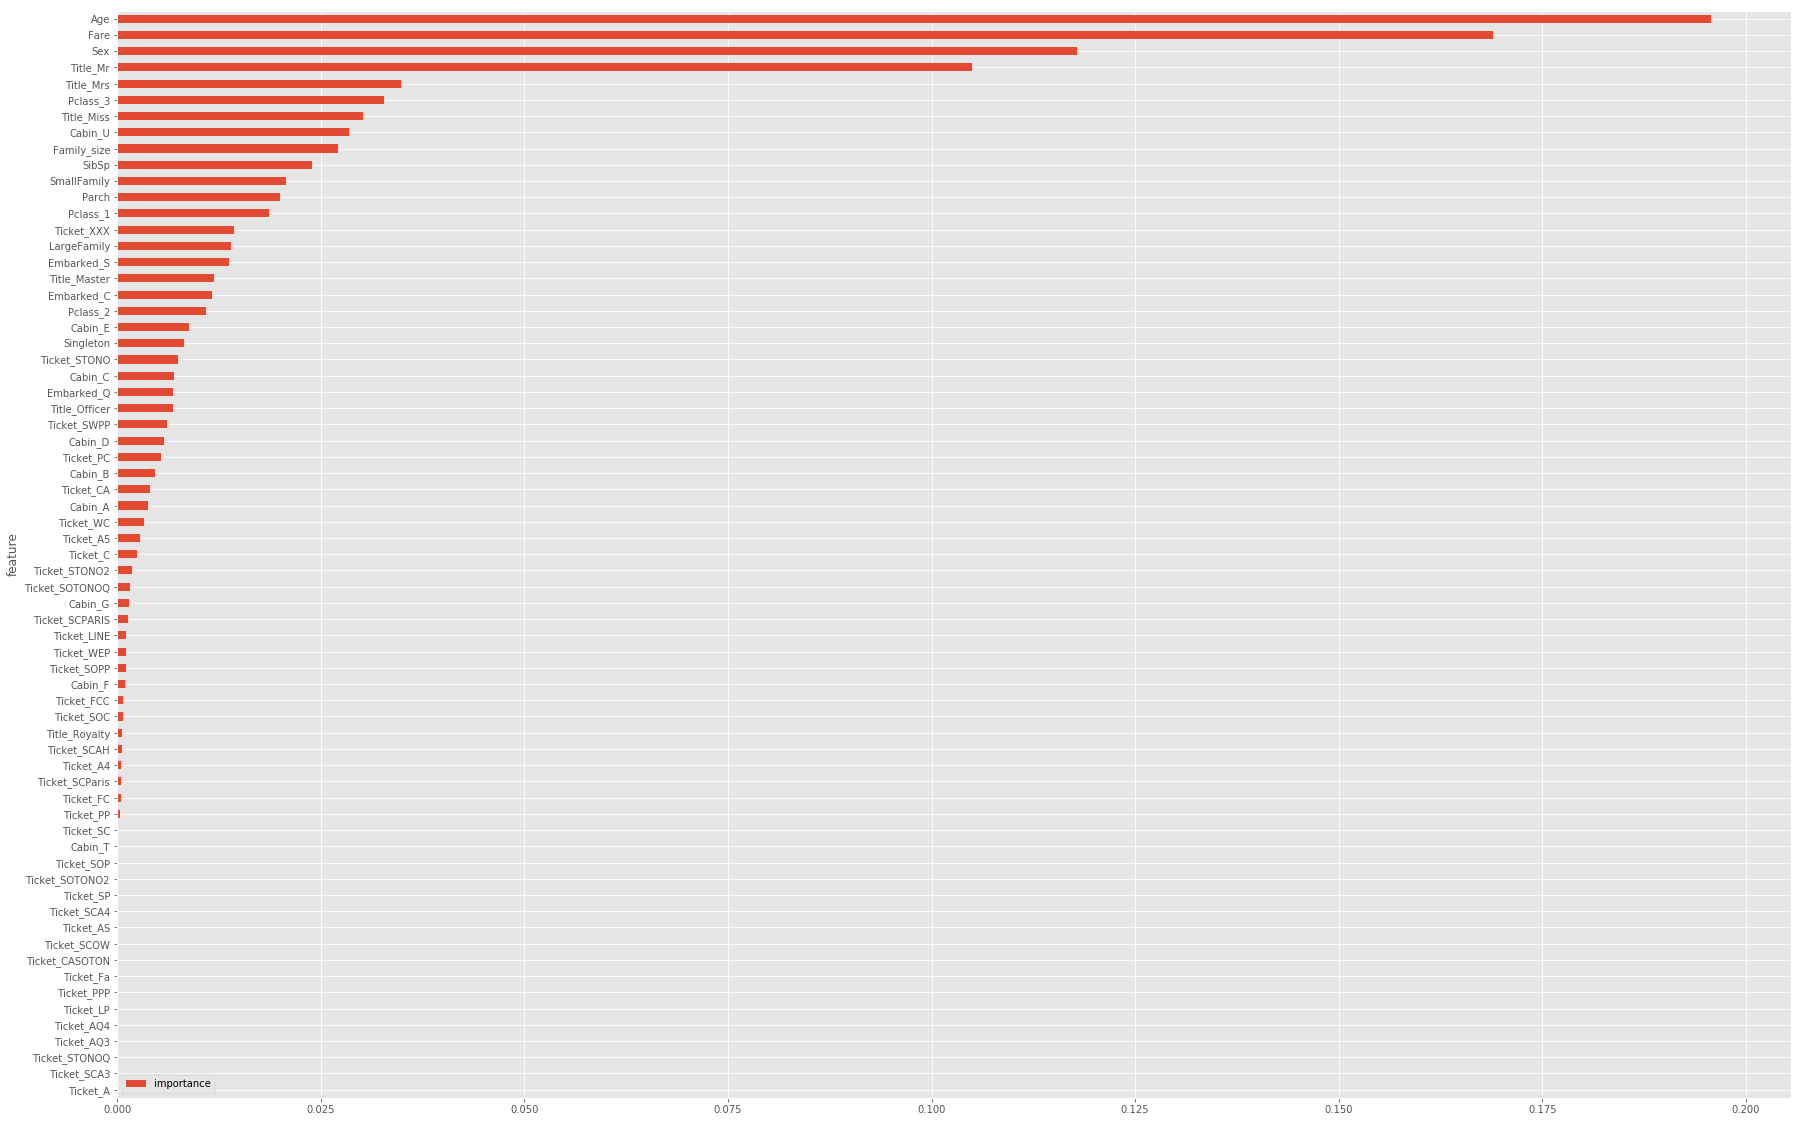

In [54]:
features.plot(kind='barh', figsize=(30,20))

In [55]:
model = SelectFromModel(clf, prefit=True)
train_reduced = model.transform(train)
train_reduced.shape

(891, 13)

In [56]:
test_reduced = model.transform(test)
test_reduced.shape

(418, 13)

In [57]:
run_gs = False

if run_gs:
    parameter_grid = {
        'max_depth' : [4, 6, 8],
        'n_estimators' : [50, 10],
        'max_features' : ['sqrt', 'auto', 'log2'],
        'min_samples_split' : [1, 3, 10],
        'min_samples_leaf' : [1, 3, 10],
        'bootstrap': [True, False]
    }
    forest = RandomForestClassifier()
    cross_validation = StratifiedKFold(targets, n_folds=5)
    
    grid_search = GridSearchCV(forest, scoring='accuracy', param_grid=parameter_grid, cv=cross_validation)
    model = grid_search
    parameters = grid_search.best_params_
    
    print('Best score: {}'.format(grid_search.best_score_))
    print('Best parameters: {}'.format(grid_search.best_params_))
    
else:
    parameters = {'bootstrap': False, 'min_samples_leaf': 3, 'n_estimators': 50, 'min_samples_split': 10, 'max_features':'sqrt', 'max_depth': 6}
    model = RandomForestClassifier(**parameters)
    model.fit(train, targets)

In [58]:
compute_score(model, train, targets, scoring='accuracy')

0.82945030954465726